In [1]:
# =========================
# 1. Import librerie
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from tslearn.metrics import cdist_dtw
from tslearn.clustering import TimeSeriesKMeans

In [2]:
import pandas as pd
from sktime.datasets import load_gunpoint
from sktime.clustering.k_means import TimeSeriesKMeans
import seaborn as sns
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Carichiamo il dataset
df = pd.read_csv("/Users/chiaraferrara/Desktop/Unipi/Magistrale/DM 2/dm2_project/dm2_dataset_2425_imdb/imdb_ts.csv")  # oppure pd.read_excel(), ecc.

In [4]:
df.head()

,id,0,1,2,3,4,5,6,7,8,...,93,94,95,96,97,98,99,rating,genre,rating_category
0,tt0062622,57057.0,65469.0,71642.0,73025.0,74060.0,49472.0,30258.0,28036.0,25824.0,...,10709.0,11042.0,11388.0,11847.0,12404.0,13679.0,15056.0,8.3,"['Adventure', 'Sci-Fi']",High
1,tt0064816,1923.0,2422.0,2853.0,2947.0,3054.0,2844.0,2617.0,1998.0,1277.0,...,637.0,734.0,857.0,785.0,724.0,713.0,699.0,7.1,"['Crime', 'Drama', 'Romance']",High
2,tt0088178,332925.0,302503.0,267264.0,261879.0,256608.0,196530.0,112728.0,117384.0,123024.0,...,6784.0,7253.0,7776.0,9632.0,11212.0,9010.0,6431.0,8.7,"['Documentary', 'Music']",High
3,tt0145487,682857.0,407032.0,78058.0,81732.0,86772.0,83724.0,79940.0,39656.0,6974.0,...,21094.0,10995.0,1586.0,1421.0,1177.0,970.0,802.0,7.4,"['Action', 'Adventure', 'Sci-Fi']",High
4,tt0359950,7813372.0,6274563.0,4781588.0,4655046.0,4535301.0,4650574.0,4758452.0,4069428.0,3471755.0,...,88635.0,68347.0,45367.0,28915.0,15494.0,16155.0,16853.0,7.3,"['Adventure', 'Comedy', 'Drama']",High


In [5]:
df.shape

(1134, 104)

In [6]:
len(df)

1134

In [7]:
df.index

RangeIndex(start=0, stop=1134, step=1)

In [8]:
# Informazioni generali
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Columns: 104 entries, id to rating_category
dtypes: float64(101), object(3)
memory usage: 921.5+ KB
None


In [20]:
df_time = df.drop(columns=['id', 'rating', 'genre', 'rating_category'])

In [9]:
# Statistiche descrittive
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,rating
count,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,...,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1134.000000
mean,9.075217e+06,8.521398e+06,7.954433e+06,7.080579e+06,6.200350e+06,4.567772e+06,2.943717e+06,2.932913e+06,2.929824e+06,2.503033e+06,...,3.173743e+05,2.546920e+05,1.909471e+05,1.804780e+05,1.711978e+05,1.457827e+05,1.192445e+05,1.153249e+05,1.111532e+05,6.584921
std,1.559543e+07,1.366932e+07,1.188300e+07,1.066701e+07,9.596818e+06,7.180084e+06,5.160170e+06,4.787618e+06,4.569201e+06,4.050967e+06,...,6.415705e+05,5.310139e+05,4.772244e+05,4.025968e+05,3.688206e+05,2.941344e+05,2.332032e+05,2.303428e+05,2.333821e+05,0.900217
min,1.266000e+03,2.422000e+03,2.853000e+03,2.947000e+03,3.054000e+03,2.844000e+03,1.940000e+03,1.865000e+03,1.277000e+03,1.449000e+03,...,3.500000e+01,3.500000e+01,1.200000e+01,3.000000e+01,2.200000e+01,2.700000e+01,2.800000e+01,3.600000e+01,8.000000e+00,2.800000
25%,4.618975e+05,4.531445e+05,4.673408e+05,4.031570e+05,3.583830e+05,2.618655e+05,1.592525e+05,1.908358e+05,2.043262e+05,1.841965e+05,...,2.182375e+04,1.651875e+04,9.954500e+03,1.058575e+04,1.100675e+04,1.010200e+04,8.811000e+03,8.601000e+03,8.172000e+03,6.100000
50%,4.025919e+06,4.033458e+06,3.895830e+06,3.517052e+06,2.964305e+06,2.191776e+06,1.181900e+06,1.359742e+06,1.440482e+06,1.179675e+06,...,7.906950e+04,5.739150e+04,3.938500e+04,4.051050e+04,3.979450e+04,3.570550e+04,3.170750e+04,2.986700e+04,2.871100e+04,6.600000
75%,1.001112e+07,9.694290e+06,9.531908e+06,8.363360e+06,7.279080e+06,5.356860e+06,3.211315e+06,3.420557e+06,3.555019e+06,2.948315e+06,...,3.227622e+05,2.504522e+05,1.494638e+05,1.626510e+05,1.647458e+05,1.469250e+05,1.189488e+05,1.151650e+05,1.072790e+05,7.300000
max,1.574616e+08,1.345532e+08,1.092641e+08,9.905818e+07,9.038924e+07,6.824053e+07,5.698972e+07,4.744864e+07,3.736173e+07,3.768914e+07,...,1.103245e+07,8.485023e+06,6.093301e+06,4.575375e+06,5.959033e+06,4.065463e+06,2.168520e+06,2.956294e+06,3.716898e+06,8.700000


In [21]:
df_time.describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,...,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03,1.134000e+03
mean,9.075217e+06,8.521398e+06,7.954433e+06,7.080579e+06,6.200350e+06,4.567772e+06,2.943717e+06,2.932913e+06,2.929824e+06,2.503033e+06,...,3.735494e+05,3.173743e+05,2.546920e+05,1.909471e+05,1.804780e+05,1.711978e+05,1.457827e+05,1.192445e+05,1.153249e+05,1.111532e+05
std,1.559543e+07,1.366932e+07,1.188300e+07,1.066701e+07,9.596818e+06,7.180084e+06,5.160170e+06,4.787618e+06,4.569201e+06,4.050967e+06,...,7.050432e+05,6.415705e+05,5.310139e+05,4.772244e+05,4.025968e+05,3.688206e+05,2.941344e+05,2.332032e+05,2.303428e+05,2.333821e+05
min,1.266000e+03,2.422000e+03,2.853000e+03,2.947000e+03,3.054000e+03,2.844000e+03,1.940000e+03,1.865000e+03,1.277000e+03,1.449000e+03,...,3.400000e+01,3.500000e+01,3.500000e+01,1.200000e+01,3.000000e+01,2.200000e+01,2.700000e+01,2.800000e+01,3.600000e+01,8.000000e+00
25%,4.618975e+05,4.531445e+05,4.673408e+05,4.031570e+05,3.583830e+05,2.618655e+05,1.592525e+05,1.908358e+05,2.043262e+05,1.841965e+05,...,2.546775e+04,2.182375e+04,1.651875e+04,9.954500e+03,1.058575e+04,1.100675e+04,1.010200e+04,8.811000e+03,8.601000e+03,8.172000e+03
50%,4.025919e+06,4.033458e+06,3.895830e+06,3.517052e+06,2.964305e+06,2.191776e+06,1.181900e+06,1.359742e+06,1.440482e+06,1.179675e+06,...,9.958600e+04,7.906950e+04,5.739150e+04,3.938500e+04,4.051050e+04,3.979450e+04,3.570550e+04,3.170750e+04,2.986700e+04,2.871100e+04
75%,1.001112e+07,9.694290e+06,9.531908e+06,8.363360e+06,7.279080e+06,5.356860e+06,3.211315e+06,3.420557e+06,3.555019e+06,2.948315e+06,...,3.777892e+05,3.227622e+05,2.504522e+05,1.494638e+05,1.626510e+05,1.647458e+05,1.469250e+05,1.189488e+05,1.151650e+05,1.072790e+05
max,1.574616e+08,1.345532e+08,1.092641e+08,9.905818e+07,9.038924e+07,6.824053e+07,5.698972e+07,4.744864e+07,3.736173e+07,3.768914e+07,...,8.511511e+06,1.103245e+07,8.485023e+06,6.093301e+06,4.575375e+06,5.959033e+06,4.065463e+06,2.168520e+06,2.956294e+06,3.716898e+06


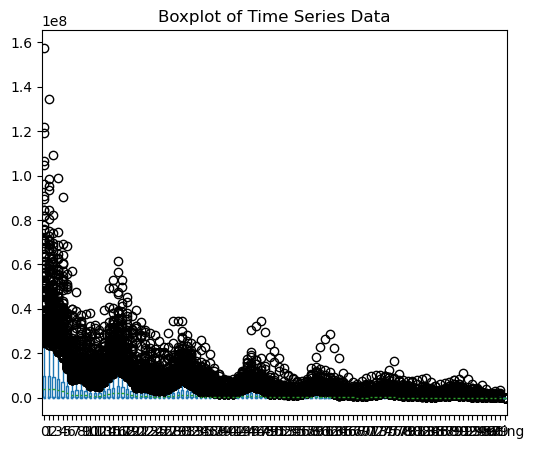

In [11]:
df.plot(kind="box", figsize=(6, 5), title="Boxplot of Time Series Data")
plt.show() 


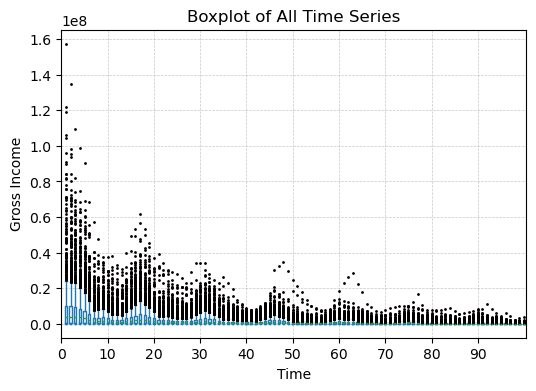

In [30]:
import matplotlib.pyplot as plt

# Customize the boxplot
df_time.plot(
    kind="box",
    figsize=(6, 4),
    title="Boxplot of All Time Series",
    flierprops=dict(marker='o', markersize=1, linestyle='none', markerfacecolor='red')  # Reduce outlier size
)

# Adjust x-axis ticks and labels
x_labels = df_time.columns  # Get the column names (x-axis labels)
step = max(1, len(x_labels) // 10)  # Show every 10th label (adjust as needed)
plt.xticks(ticks=range(0, len(x_labels), step), labels=x_labels[::step], rotation=0)

# Add axis labels
plt.xlabel("Time")  # Add x-axis label
plt.ylabel("Gross Income")  # Add y-axis label

# Add grid for better readability
plt.grid(axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()

In [199]:
# Controllo valori nulli
print(df.isnull().sum())

id                 0
0                  0
1                  0
2                  0
3                  0
                  ..
98                 0
99                 0
rating             0
genre              0
rating_category    0
Length: 104, dtype: int64


In [200]:
missing = df.isnull().sum()
missing[missing > 0]  # mostra solo quelle con almeno un NaN


Series([], dtype: int64)

In [201]:
print(df['id'].nunique())

1134


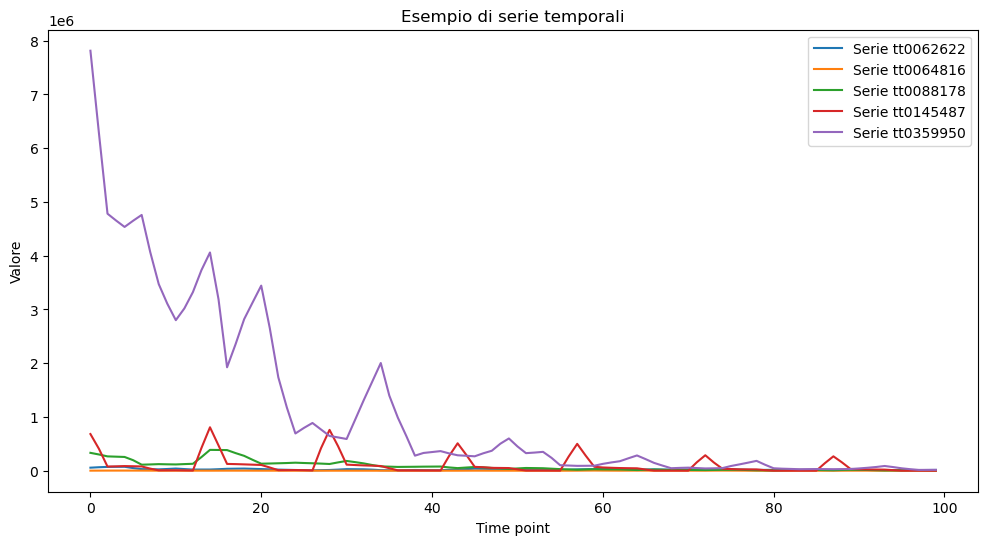

In [202]:
plt.figure(figsize=(12,6))
for i in range(5):  # mostra le prime 5 serie
    serie = df.iloc[i, 1:101].values  # colonne 0-99 sono time series
    plt.plot(serie, label=f'Serie {df.iloc[i,0]}')
plt.title("Esempio di serie temporali")
plt.xlabel("Time point")
plt.ylabel("Valore")
plt.legend()
plt.show()

# Split

In [203]:
from sklearn.model_selection import train_test_split



# X = colonne time series
X = df.iloc[:, 1:101].values
y = df['rating_category'].values

# indici originali
indices = df.index.values

# split
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, indices, test_size=0.2, random_state=42, stratify=y
)


In [204]:
X_train.shape, idx_train.shape

((907, 100), (907,))

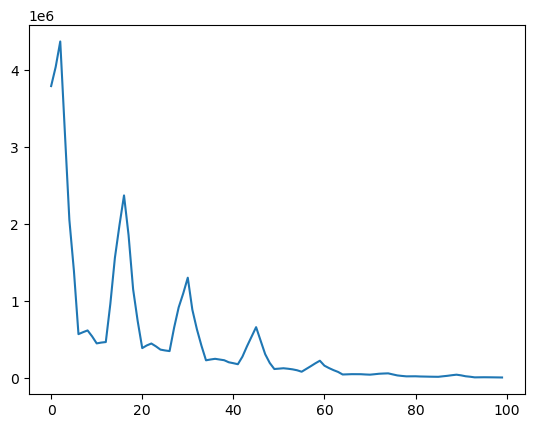

In [205]:
plt.plot(X_train[0].T)

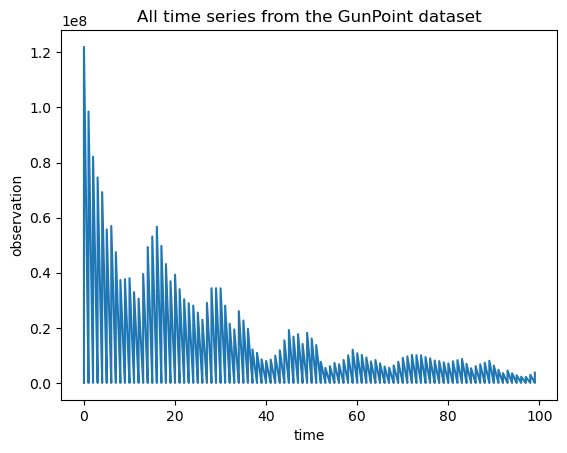

In [ ]:
df = pd.DataFrame(np.squeeze(X_train))
df_melt = df.melt(value_name="observation", var_name="time")
sns.lineplot(df_melt, x="time", y="observation", estimator=None)
plt.title("Training Set Time Series")
plt.show()

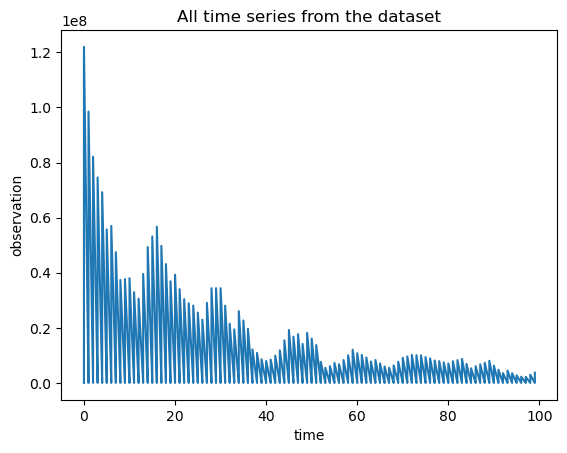

In [207]:
df = pd.DataFrame(np.squeeze(X_train))
df_melt = df.melt(value_name="observation", var_name="time")
sns.lineplot(df_melt, x="time", y="observation", estimator=None)
plt.title("All time series from the dataset")
plt.show()

# non sono time e observation

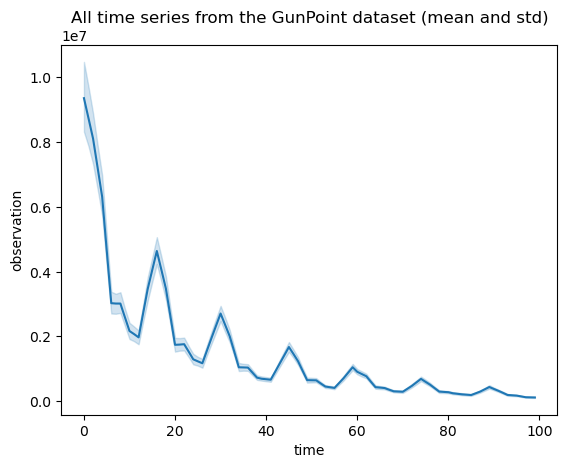

In [ ]:
sns.lineplot(df_melt, x="time", y="observation", estimator="mean")
plt.title("All time series from the dataset (mean and std)")
plt.show()

# Clustering 2

In [209]:
clusterer = TimeSeriesKMeans(n_clusters=2, metric="euclidean")

In [210]:
%%time
clusterer.fit(X_train)

CPU times: user 230 ms, sys: 12.8 ms, total: 243 ms
Wall time: 250 ms


TimeSeriesKMeans(metric='euclidean', n_clusters=2)

In [211]:
df['cluster'] = clusterer.labels_

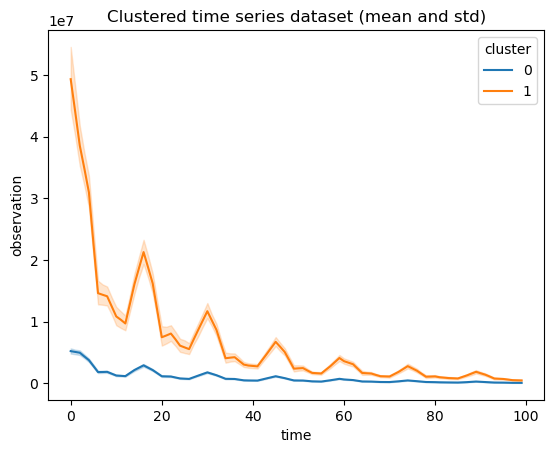

In [212]:
df_melt = df.melt(value_name="observation", var_name="time", id_vars="cluster")
sns.lineplot(df_melt, x="time", y="observation", hue="cluster")
plt.title("Clustered time series dataset (mean and std)")
plt.show()

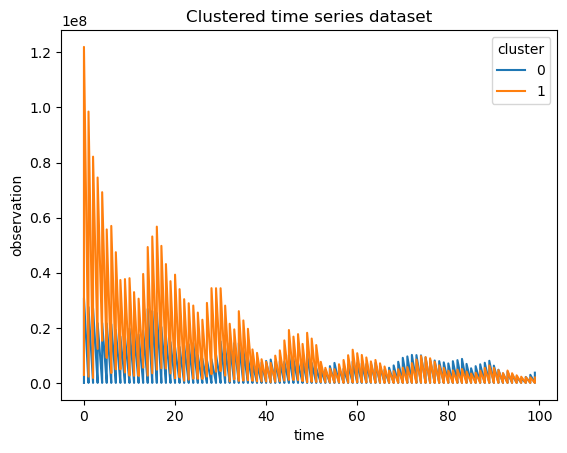

In [213]:
sns.lineplot(df_melt, x="time", y="observation", hue="cluster", estimator=None)
plt.title("Clustered time series dataset")
plt.show()

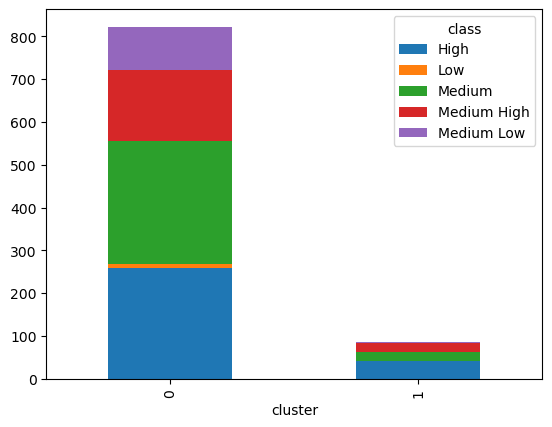

In [214]:
pd.crosstab(df["cluster"], y_train).plot(kind="bar", stacked=True)
plt.legend(title="class")

# Clustering

In [233]:
# Carichiamo il dataset
df = pd.read_csv("/Users/chiaraferrara/Desktop/Unipi/Magistrale/DM 2/dm2_project/dm2_dataset_2425_imdb/imdb_ts.csv")  # oppure pd.read_excel(), ecc.

In [234]:
X = df.iloc[:, 1:101].values  # colonne time series
y = df['rating_category'].values  # target per classificazione futura
indices = df.index.values  # indici originali

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, indices, test_size=0.2, random_state=42, stratify=y
)


In [235]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [236]:
from tslearn.metrics import cdist_dtw
from scipy.spatial.distance import cdist

In [237]:
n_clusters = 6 # placeholder
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train_scaled)

# Cluster train
df.loc[idx_train, 'cluster_euclidean'] = kmeans.labels_

# Cluster test
distances = cdist(X_test_scaled, kmeans.cluster_centers_)
clusters_test = distances.argmin(axis=1)
df.loc[idx_test, 'cluster_euclidean'] = clusters_test

In [238]:
# Aggiungiamo dimensione extra
X_train_scaled_3d = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled_3d = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

clusterer = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=10, random_state=42)
clusterer.fit(X_train_scaled_3d)

df.loc[idx_train, 'cluster_dtw'] = clusterer.labels_

distances = cdist_dtw(X_test_scaled_3d, clusterer.cluster_centers_)
clusters_test_dtw = distances.argmin(axis=1)
df.loc[idx_test, 'cluster_dtw'] = clusters_test_dtw

In [239]:
from sklearn.metrics import silhouette_score

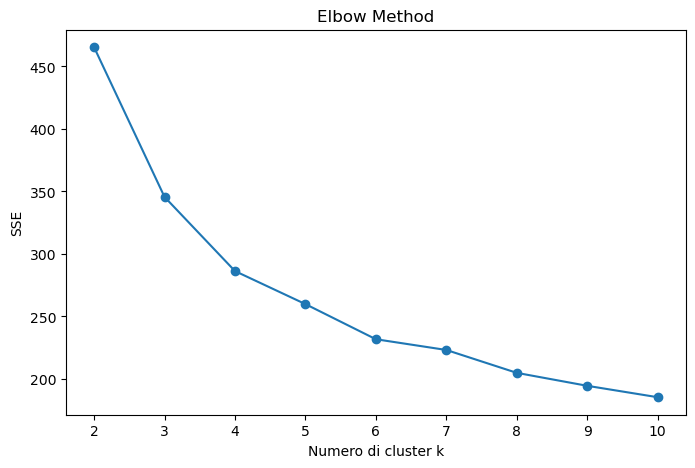

Silhouette score Euclidean: 0.4487850063966557


In [240]:
sse = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.xlabel("Numero di cluster k")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

sil_score = silhouette_score(X_train_scaled, kmeans.labels_)
print("Silhouette score Euclidean:", sil_score)

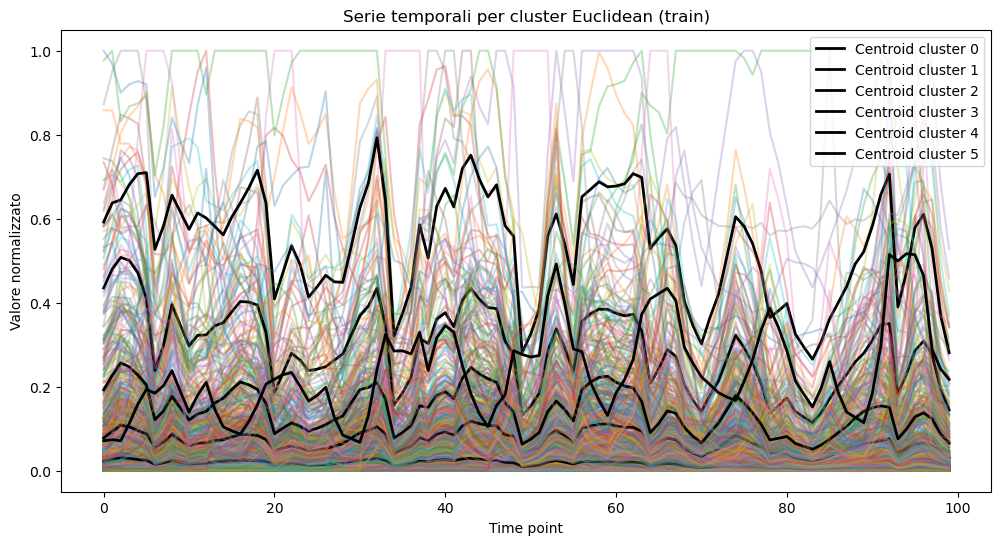

In [241]:
plt.figure(figsize=(12,6))
for c in range(n_clusters):
    subset = X_train_scaled[kmeans.labels_ == c]
    for serie in subset:
        plt.plot(serie, alpha=0.3)
    plt.plot(kmeans.cluster_centers_[c].ravel(), color='black', linewidth=2, label=f'Centroid cluster {c}')
plt.title("Serie temporali per cluster Euclidean (train)")
plt.xlabel("Time point")
plt.ylabel("Valore normalizzato")
plt.legend()
plt.show()

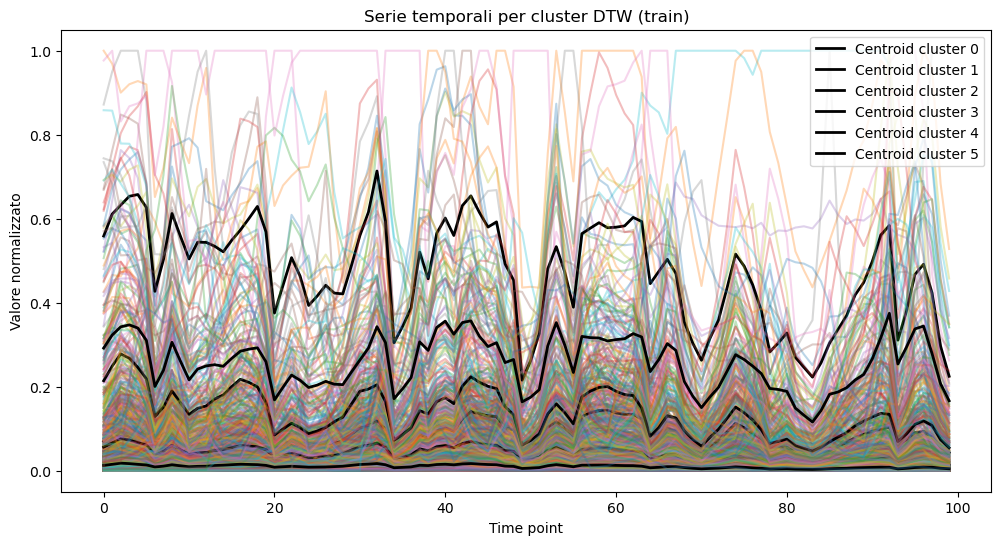

In [242]:
plt.figure(figsize=(12,6))
for c in range(n_clusters):
    subset = X_train_scaled_3d[clusterer.labels_ == c].reshape(-1, X_train_scaled_3d.shape[1])
    for serie in subset:
        plt.plot(serie, alpha=0.3)
    plt.plot(clusterer.cluster_centers_[c].ravel(), color='black', linewidth=2, label=f'Centroid cluster {c}')
plt.title("Serie temporali per cluster DTW (train)")
plt.xlabel("Time point")
plt.ylabel("Valore normalizzato")
plt.legend()
plt.show()

In [243]:
print("Euclidean:")
print(df.groupby('cluster_euclidean')['rating'].mean())
print(df.groupby('cluster_euclidean')['rating_category'].value_counts())

print("\nDTW:")
print(df.groupby('cluster_dtw')['rating'].mean())
print(df.groupby('cluster_dtw')['rating_category'].value_counts())

Euclidean:
cluster_euclidean
0.0    6.447863
1.0    7.227083
2.0    6.589474
3.0    7.586667
4.0    6.897115
5.0    7.516667
Name: rating, dtype: float64
cluster_euclidean  rating_category
0.0                Medium             241
                   High               202
                   Medium High        143
                   Medium Low         107
                   Low                  9
1.0                High                29
                   Medium              10
                   Medium High          9
2.0                Medium              99
                   High                80
                   Medium High         47
                   Medium Low          20
                   Low                  1
3.0                High                12
                   Medium High          3
4.0                High                41
                   Medium              36
                   Medium High         26
                   Medium Low           1
5.0          

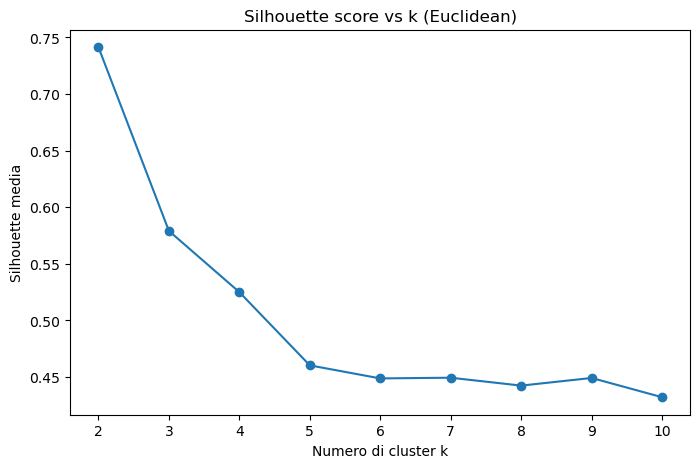

In [244]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, km.labels_)
    sil_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Numero di cluster k")
plt.ylabel("Silhouette media")
plt.title("Silhouette score vs k (Euclidean)")
plt.show()
